## Titanic Survival using Machine Learning Techniques

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Importing the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import warnings
%matplotlib inline
sns.set_style('whitegrid')
cf.go_offline()

## Read the datasets

In [3]:
train = pd.read_csv('C:/Users/This PC/TitanicPrediction/train.csv')

In [4]:
test = pd.read_csv('C:/Users/This PC/TitanicPrediction/test.csv')

## Exploratory Data Analysis

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Initial Takeaways

..* The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive.

## Checking Null Values 

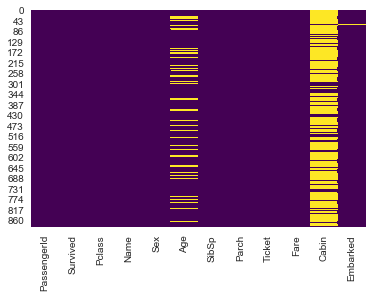

In [8]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning

In [11]:
# these columns do not contain useful information
drop_column = ['PassengerId','Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

In [12]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

    
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

## Feature Engineering

In [13]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
train=pd.concat([train,sex,embark],axis=1)

In [14]:
train.drop(['Sex','Embarked','Name'],axis=1,inplace=True)

In [15]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Checking Pearson Correlation

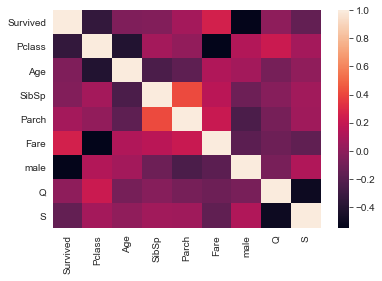

In [16]:
sns.heatmap(train.corr(), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

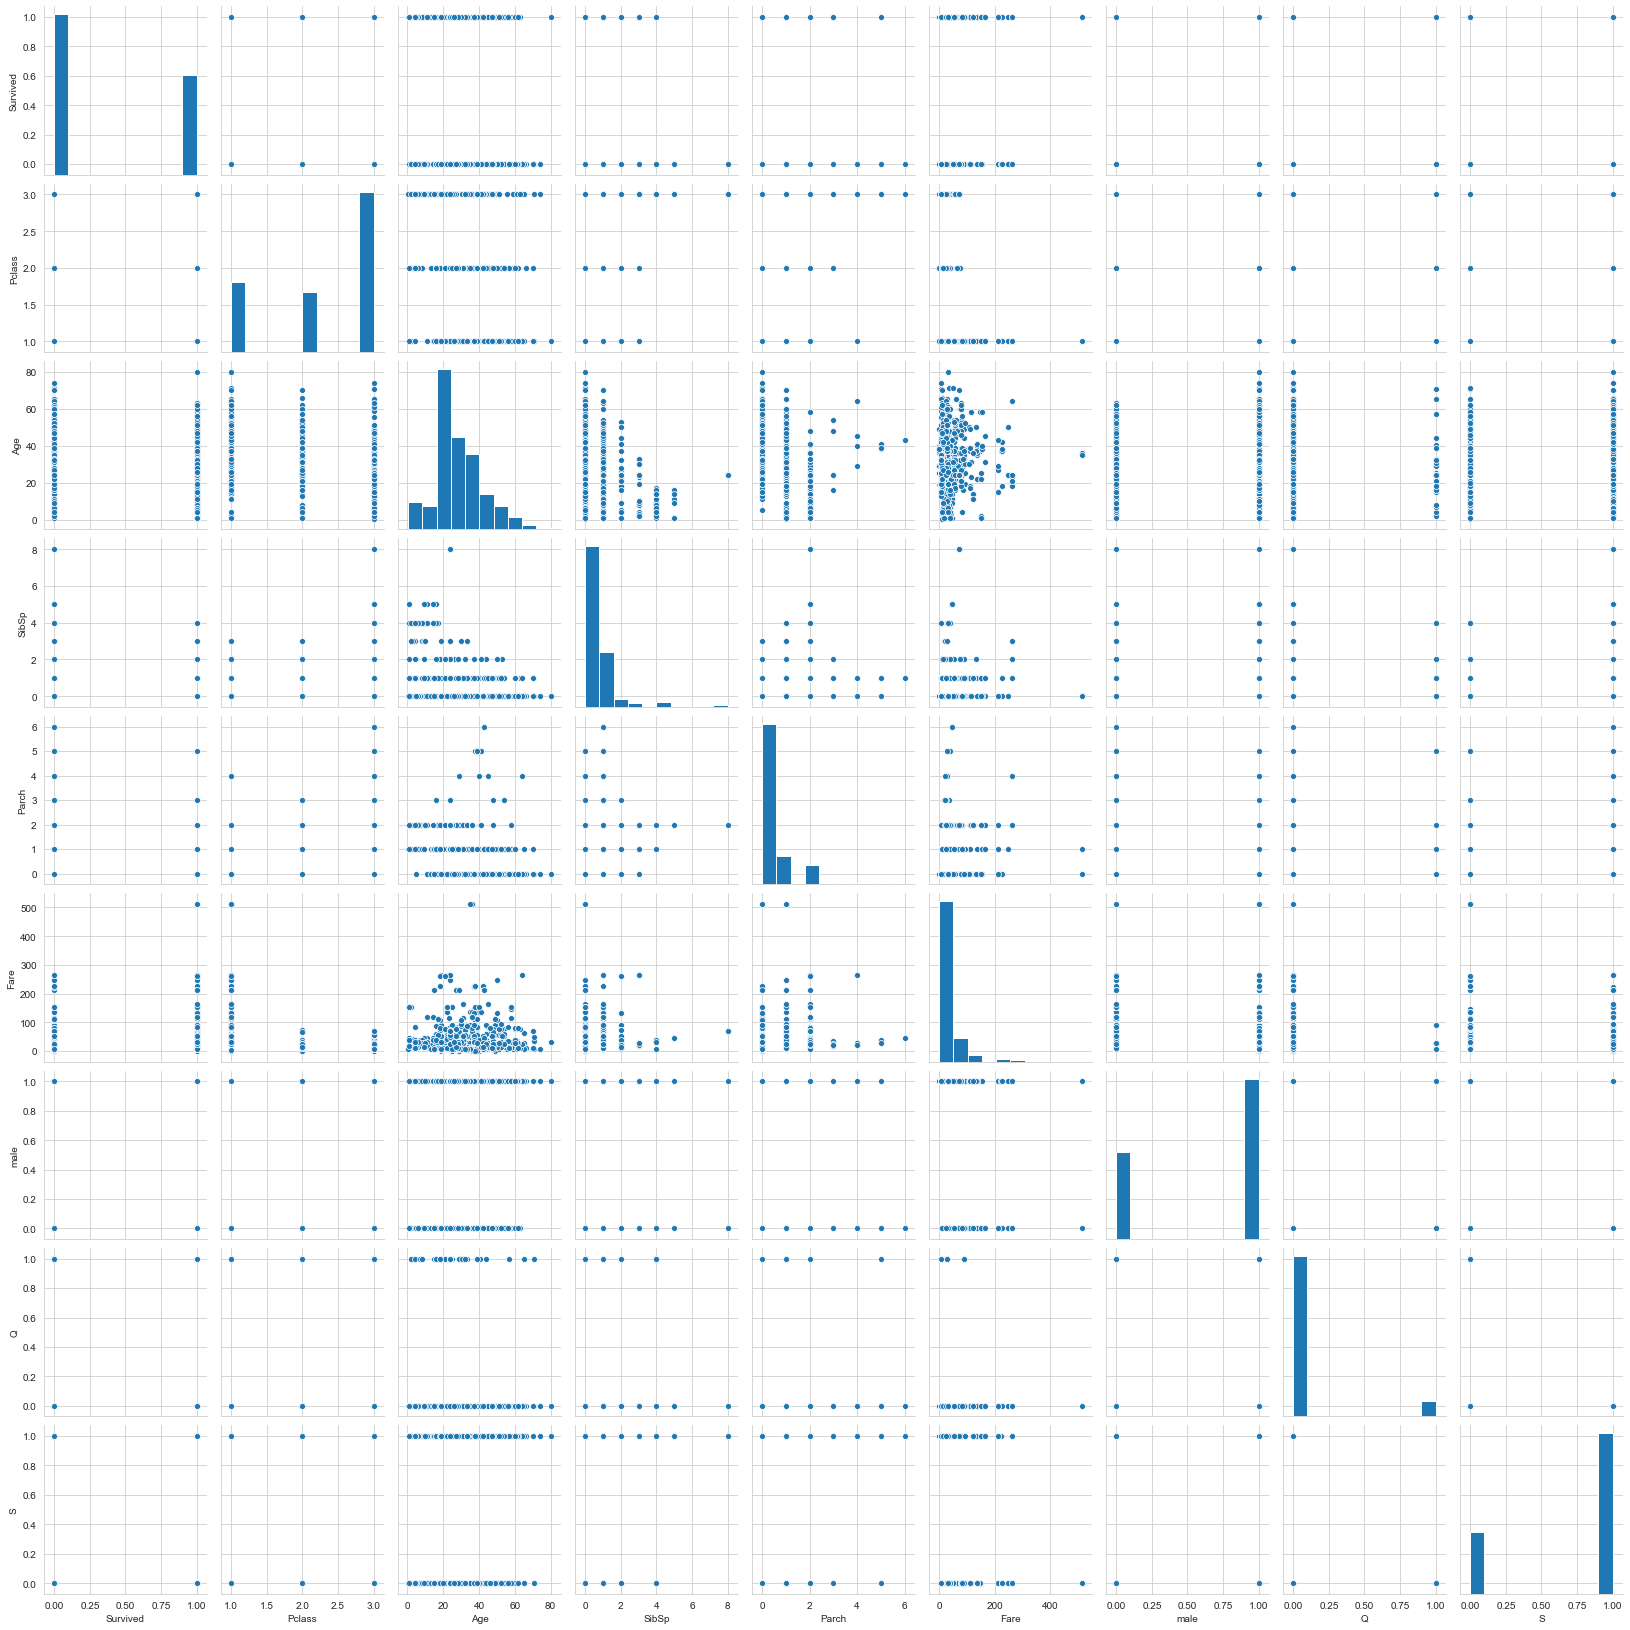

In [17]:
sns.pairplot(train, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

## Data Visualization 

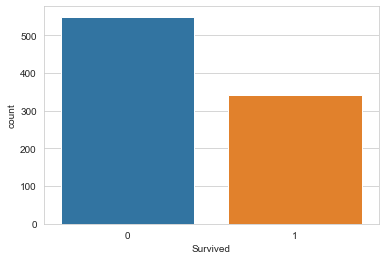

In [24]:
sns.countplot(x='Survived',data=train)

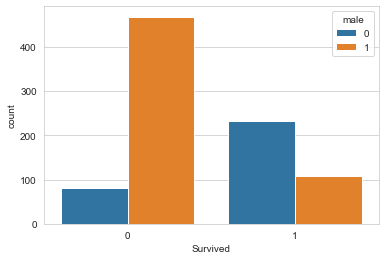

In [26]:
sns.countplot(x='Survived',hue='male',data=train)

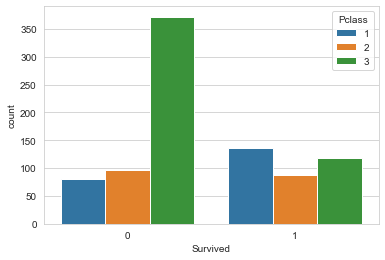

In [27]:
sns.countplot(x='Survived',hue='Pclass',data=train)

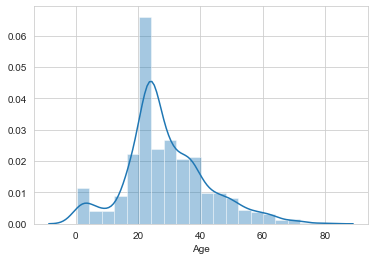

In [28]:
sns.distplot(train['Age'].dropna(),kde=True,bins=20)

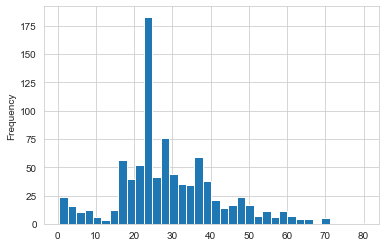

In [29]:
train['Age'].plot.hist(bins=36)

In [32]:
train['Age'].iplot(kind='hist',bins=50)

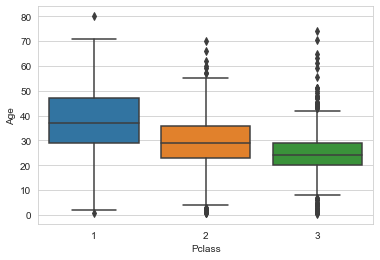

In [33]:
sns.boxplot(x='Pclass',y='Age',data=train)

##  Lets split Train Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size = 0.25, random_state = 0)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7982062780269058

### K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
knnclassifier.fit(X_train, y_train)
knnclassifier.score(X_test, y_test)

0.726457399103139

##### checking different neighbours

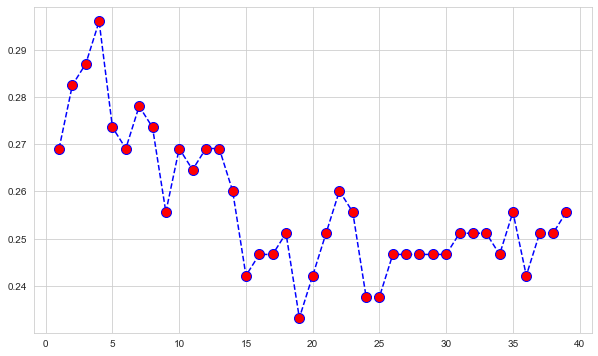

In [22]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)

In [23]:
#taking 19 as value of k as it has low error
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7668161434977578

### Support Vector Machines

In [27]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)
svcclassifier.score(X_test, y_test)

0.7802690582959642

### Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB
gnbclassifier = GaussianNB()
gnbclassifier.fit(X_train, y_train)
gnbclassifier.score(X_test, y_test)

0.7757847533632287

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train, y_train)
rclassifier.score(X_test, y_test)

0.8161434977578476

## Accuracies

### Logistic Regression: 79.82%

### K-Nearest Neighbors: 72.65%

### Support Vector Machines: 78.03%

### Naive Bayes Classifier: 77.58%

### Random Forest: 81.61%

# Random Forest is giving the best accuracy.